# Unit 5 - Financial Planning


In [284]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [285]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [286]:
# Set current amount of crypto assets

BTC = 1.2
ETH = 5.3

In [287]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [288]:
# Fetch current BTC price

btc_url = btc_url + "?format=json"
btc_response = requests.get(btc_url)
# Fetch current ETH price

eth_url = eth_url + "?format=json"
eth_response = requests.get(eth_url)
# Compute current value of my crpto


btc_response_json = btc_response.json()
eth_response_json = eth_response.json()
print(btc_response_json)
print(eth_response_json)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18525337, 'total_supply': 18525337, 'max_supply': 21000000, 'quotes': {'USD': {'price': 12957.45, 'volume_24h': 20494692303, 'market_cap': 239974551168, 'percentage_change_1h': -0.0137354457753482, 'percentage_change_24h': 0.383879413069392, 'percentage_change_7d': 14.4742193311354, 'percent_change_1h': -0.0137354457753482, 'percent_change_24h': 0.383879413069392, 'percent_change_7d': 14.4742193311354}}, 'last_updated': 1603515234}}, 'metadata': {'timestamp': 1603515234, 'num_cryptocurrencies': 1429, 'error': None}}
{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 113133603, 'total_supply': 113133603, 'max_supply': 0, 'quotes': {'USD': {'price': 411.59, 'volume_24h': 10256979008, 'market_cap': 46548807805, 'percentage_change_1h': 0.0547631773706174, 'percentage_change_24h': -0.15623596641

In [289]:
btc_rate = btc_response_json['data']['1']['quotes']['USD']['price']
my_btc_value = float(BTC * btc_rate)

eth_rate = eth_response_json['data']['1027']['quotes']['USD']['price']
my_eth_value = float(BTC * eth_rate)


In [290]:
# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {ETH} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15548.94
The current value of your 5.3 ETH is $493.91


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [291]:
# Current amount of shares

spy_shares = 50
agg_shares = 200

In [292]:
shares_data = {
    "shares": [16727.50, 23889.00]
}

# Set the tickers
tickers = ["SPY", "AGG"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares


shares
SPY  16727.5
AGG  23889.0

In [293]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEYS")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEYS")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [294]:
# Create the Alpaca API object

#alpaca_api_key = "ALPACA_API_KEYS"
#alpaca_secret_key = "ALPACA_SECRET_KEYS"
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [295]:
# Format current date as ISO format

start_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Preview DataFrame

df_portfolio

AGG                                       SPY  \
                             open    high     low    close   volume    open   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2829309  343.33   

                                                             
                             high     low   close    volume  
2020-10-21 00:00:00-04:00  345.67  342.45  342.69  43419032

In [296]:
# Pick AGG and SPY close prices

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.515
Current SPY closing price: $342.69


In [297]:
# Compute the current value of shares

my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
# Print current value of share
print(f"The current value of your {spy_shares} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {agg_shares} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5732346.97
The current value of your 200 AGG shares is $2807315.83


### Savings Health Analysis

In [298]:
# Set monthly household income

monthly_income = 12000
# Create savings DataFrame

assets = {"crypto", "shares"}
savings_data= {"amount":[19385.98,40616.50]}
df_savings = pd.DataFrame(savings_data, index = assets)
# Display savings DataFrame
display(df_savings)

amount
shares  19385.98
crypto  40616.50

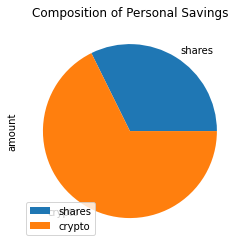

In [299]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title="Composition of Personal Savings") 

In [300]:
# Set ideal emergency fund

emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = df_savings['amount'].sum()


# Validate saving health

difference_savings = total_savings - emergency_fund
difference_savings
if (total_savings > emergency_fund):
    print(f"Congratulations you have enough money in this fund")
elif (total_savings == emergency_fund):
    print(f"Congratulations you are reaching this financial goal")
else:
    print (f" you are away: {difference_savings} reaching the goal")
        

Congratulations you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [253]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen


start_date = pd.Timestamp('2015-10-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-23', tz='America/New_York').isoformat()

In [257]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
# Set timeframe to '1D'
timeframe = "1D"

# Set the ticker information
tickers = ["AGG","SPY"]

# Get 5 year's worth of historical price data
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796  206.97   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003  208.34   

                                                              
                             high     low   close     volume  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  209.27  208.21  208.87   64052955

In [258]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [259]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [260]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004334  1.003954  1.004646  0.993619  1.001248  1.003796  1.006197   
2     1.000542  1.000711  0.991712  0.989530  0.998615  1.002204  1.007235   
3     1.000861  0.999514  0.995633  0.987587  1.000493  1.004774  1.003725   
4     1.000162  0.999295  0.988833  0.986766  1.001143  0.993507  1.002507   
...        ...       ...       ...       ...       ...       ...       ...   
7556  3.899836  8.629177  6.639114  3.640878  2.657626  6.424246  3.273241   
7557  3.913203  8.539693  6.658438  3.673266  2.686265  6.475034  3.280540   
7558  3.919555  8.543180  6.634130  3.685719  2.680448  6.516496  3.280727   
7559  3.948965  8.510474  6.587450  3.678356  2.679693  6.485172  3.274545   
7560  3.989704  8.514078  6.553687  3.685418  2.665406  6.564922  3.277602   

           7         8         9    ...       490       491        492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000   1.000000   
1     1.007191  1.001374  0.993942  ...  1.005448  0.999673   0.998503   
2     1.003478  0.998444  0.992994  ...  1.003573  0.991188   1.005373   
3     1.005708  1.002600  0.999549  ...  1.008482  0.992928   1.009951   
4     0.999353  1.007129  1.003005  ...  1.003425  0.991358   1.011252   
...        ...       ...       ...  ...       ...       ...        ...   
7556  5.530085  7.663027  3.001327  ...  2.999612  5.718234  12.086984   
7557  5.535587  7.669307  3.028018  ...  2.995900  5.726654  12.119479   
7558  5.507540  7.682706  3.040657  ...  2.999479  5.725580  12.240026   
7559  5.488523  7.678222  3.013201  ...  2.985053  5.739245  12.266094   
7560  5.511899  7.625322  3.038033  ...  2.983813  5.721568  12.365869   

            493       494       495       496       497        498       499  
0      1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  
1      1.002041  0.997623  1.003440  1.006480  1.001270   0.991840  0.999441  
2      1.002427  0.995469  1.002401  1.003685  1.008610   0.988780  1.000043  
3      1.006201  0.985528  1.012775  1.005957  1.003531   0.984236  0.992225  
4      1.009946  0.985675  1.012024  0.997544  1.010980   0.989045  0.997359  
...         ...       ...       ...       ...       ...        ...       ...  
7556  13.990865  6.218645  3.977127  2.731202  4.974336  16.535785  4.551025  
7557  13.920642  6.211393  3.968528  2.719407  4.966477  16.497594  4.584971  
7558  13.876853  6.239074  3.979030  2.719453  4.947822  16.623877  4.591726  
7559  13.862895  6.250667  3.976193  2.693948  4.954870  16.677631  4.563644  
7560  13.828631  6.263383  3.964449  2.716676  5.000117  16.767396  4.564951  

[7561 rows x 500 columns]

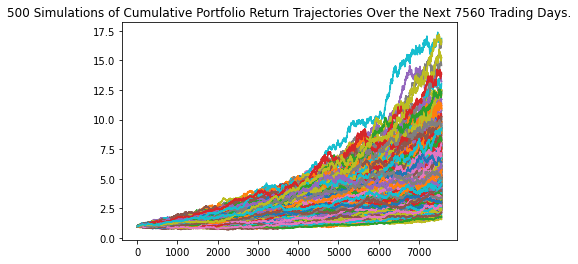

In [261]:
# Plot simulation outcomes

line_plot = MC_thirty.plot_simulation()


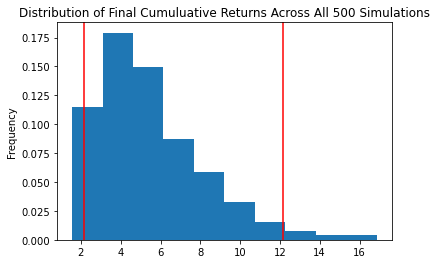

In [262]:
# Plot probability distribution and confidence intervals


dist_plot = MC_thirty.plot_distribution()


### Retirement Analysis

In [264]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_thirty.summarize_cumulative_return()

# Print summary statistics

print(tbl) 


count           500.000000
mean              5.477644
std               2.644240
min               1.559346
25%               3.486933
50%               4.944752
75%               6.798631
max              16.853989
95% CI Lower      2.164034
95% CI Upper     12.178107
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [265]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43280.68 and $243562.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [267]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $64921.02 and $365343.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [268]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [269]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.007934  0.992871  0.996751  1.002229  1.003530  0.994196  1.006756   
2     1.009301  0.995115  0.998812  0.994140  0.996128  0.991090  1.002764   
3     1.003508  0.993776  1.001650  0.998414  0.991316  0.995096  1.003686   
4     1.005021  0.996412  1.006284  0.994385  0.993966  0.997857  1.003707   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.804581  1.339420  1.398490  1.294231  1.165024  1.521190  1.562076   
1257  1.802874  1.333100  1.387204  1.296416  1.167642  1.515944  1.556425   
1258  1.804827  1.341886  1.395679  1.289377  1.170778  1.516677  1.551830   
1259  1.810877  1.353172  1.382233  1.291716  1.170764  1.524056  1.552528   
1260  1.825010  1.359058  1.381753  1.291562  1.174200  1.525699  1.559019   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.001599  1.003212  1.003224  ...  0.991149  0.994730  0.997241   
2     1.008673  0.999992  1.007029  ...  0.989026  0.994413  0.996667   
3     1.007518  0.998189  1.008292  ...  0.989084  0.999369  0.996834   
4     1.013044  0.998623  1.011003  ...  0.993300  0.999732  0.994829   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.097572  1.000604  1.191851  ...  1.089963  1.324115  1.374099   
1257  1.104157  0.996786  1.195234  ...  1.089665  1.334223  1.372942   
1258  1.103932  0.995352  1.196375  ...  1.085872  1.329167  1.369945   
1259  1.095394  0.995519  1.191061  ...  1.086694  1.332600  1.381856   
1260  1.101261  0.993223  1.182732  ...  1.091815  1.335380  1.371306   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000651  1.002512  1.006348  0.994792  0.998832  1.001835  0.989410  
2     0.998142  1.005497  1.008830  1.006768  0.993524  0.997637  0.988910  
3     0.996461  1.001404  1.007328  1.013457  0.998107  0.999434  0.985493  
4     0.990987  1.002981  1.003790  1.005858  0.993411  1.002921  0.981568  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.112344  0.980553  1.495312  1.100181  0.978172  1.361097  1.493039  
1257  1.105654  0.979076  1.493372  1.104371  0.981256  1.365575  1.491251  
1258  1.113884  0.984674  1.504036  1.102425  0.985172  1.369539  1.481128  
1259  1.121139  0.978018  1.506003  1.097893  0.979163  1.373839  1.483521  
1260  1.116896  0.973904  1.500644  1.100209  0.981219  1.385839  1.479052  

[1261 rows x 500 columns]

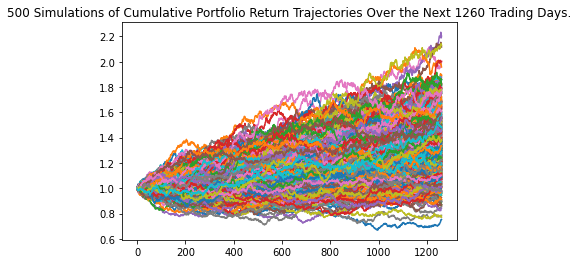

In [272]:
# Plot simulation outcomes
line_plot = MC_five.plot_simulation()

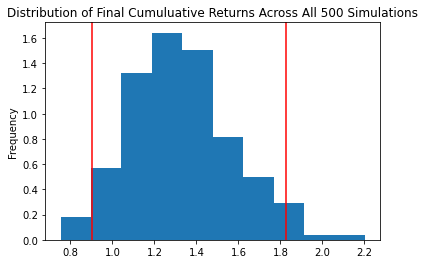

In [273]:
# Plot probability distribution and confidence intervals

dist_plot = MC_five.plot_distribution()

In [274]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_five.summarize_cumulative_return()
# Print summary statistics
print(tbl) 

count           500.000000
mean              1.328587
std               0.242517
min               0.752656
25%               1.151693
50%               1.314548
75%               1.470400
max               2.202138
95% CI Lower      0.900325
95% CI Upper      1.827819
Name: 1260, dtype: float64


In [277]:
# Set initial investment

initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(tbl[8]*40000,2)
ci_upper_five = round(tbl[9]*40000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $36012.99 and $73112.75


### Ten Years Retirement Option

In [278]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [279]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.000978  1.002937  1.008169  1.005998  1.000978  1.000624  0.992201   
2     1.005124  1.012173  1.009934  1.008755  1.003598  0.996497  0.999209   
3     0.996061  1.017492  1.006003  1.009081  0.998174  0.996969  1.004635   
4     0.987489  1.018320  0.993546  1.012239  0.999954  0.995370  1.004467   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.465886  1.583197  1.554186  2.233093  2.300413  1.471138  1.655682   
2517  1.468406  1.592456  1.552216  2.254402  2.308772  1.473513  1.651417   
2518  1.467735  1.585669  1.560354  2.251594  2.295471  1.459532  1.662650   
2519  1.464941  1.591393  1.549040  2.236399  2.312731  1.462867  1.652184   
2520  1.465450  1.593230  1.551658  2.233852  2.305656  1.463851  1.669688   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.999101  1.001583  1.001398  ...  0.996121  0.997417  0.993564   
2     1.006651  1.001929  0.992437  ...  0.990664  1.000128  0.991975   
3     1.013586  1.009415  0.997583  ...  0.998323  1.004927  0.994749   
4     1.013308  1.011555  0.993572  ...  0.994133  1.003576  0.984299   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.438111  1.867332  1.968799  ...  1.568882  3.034642  1.895259   
2517  1.434961  1.875675  1.981515  ...  1.561324  3.016884  1.909332   
2518  1.433440  1.864541  1.960542  ...  1.559039  3.041342  1.908316   
2519  1.432137  1.864738  1.961200  ...  1.566796  3.055187  1.915365   
2520  1.443973  1.855016  1.985615  ...  1.556826  3.055805  1.925980   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.007348  1.005342  0.999457  1.000392  1.003752  0.994729  0.996523  
2     1.004402  1.000423  1.008412  0.996822  1.006769  1.000908  1.001487  
3     1.011899  0.997951  1.014784  1.004619  1.001181  0.996698  0.998336  
4     1.007508  0.998666  1.012644  1.008156  1.001353  0.999898  1.000119  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.827371  1.311604  1.368336  2.601990  1.866930  2.263234  1.234904  
2517  1.825444  1.312759  1.360652  2.579772  1.841420  2.275325  1.240823  
2518  1.836367  1.307089  1.352744  2.612313  1.845883  2.283230  1.240973  
2519  1.834031  1.298712  1.344097  2.598477  1.847551  2.267483  1.239374  
2520  1.844109  1.310405  1.338203  2.606343  1.849258  2.270847  1.240123  

[2521 rows x 500 columns]

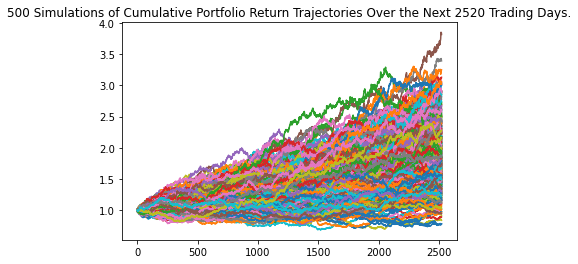

In [280]:
# Plot simulation outcomes
line_plot = MC_ten.plot_simulation()

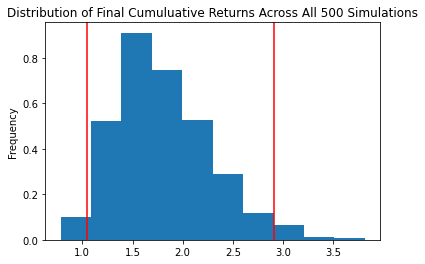

In [281]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten.plot_distribution()

In [282]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_ten.summarize_cumulative_return()

# Print summary statistics

print(tbl)

count           500.000000
mean              1.808363
std               0.473317
min               0.782967
25%               1.480141
50%               1.748025
75%               2.099798
max               3.813939
95% CI Lower      1.043281
95% CI Upper      2.906349
Name: 2520, dtype: float64


In [283]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62596.86 and $174380.93
